## ANALIZA NBA IGRALCEV

Za projekt pri predmetu Programiranje 1 sem izbrala NBA igralce vseh časov. Liga NBA (National Basketball Association) je najmočnejša košarkarska liga na svetu, v kateri tekmuje kar 30 ekip (ena ekipa je kanadska). Ustanovljena je bila leta 1946 v NY.
Podatke sem pridobila s spletne strani http://en.hispanosnba.com/players/nba-all/index.

Za obdelavo teh podatkov sem se odločila, ker sem velika oboževalka košarke in redna gledalka NBA tekem in zato tudi vem, kaj je smiselno obdelovati in kakšne rezultate lahko pričakujem.

V spodnji tabeli je predstavljenih prvih 20 igralcev v abecednem vrstnem redu, njihove igralne pozicije, višina, čas igranja, število igralnih sezon, univerza in številka izbora na naboru, na katerem so bili izbrani.
Za vsakega igralca je pripisano še povprečje v točkah na tekmo, skokih, asistencah, uspešnost v zadetih metih iz igre, trojkah in zadetih prostih metih (v procentih).

Podatki o povprečju uspešnosti v igri so vzeti samo iz tekem redne sezone (brez playoffs in finals). Za upokojene igralce ti podatki predstavljajo povprečje vseh odigranih sezon. Za igralce, ki še igrajo (oz. so še igrali v zadnji sezoni, tj. 2017/2018), pa so upoštevana povprečja tekem zadnje sezone.



In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import pyplot as plot

%matplotlib inline

In [3]:
podatki = pd.read_csv('players.csv', encoding = "utf-8")
podatki[:20]

,player_name,player_link,position,height,from,to,seasons,nationality,college,pick,points_per_game,rebounds_per_game,assists_per_game,field_goals,three_points,free_throws
0,Alaa Abdelnaby,alaa-abdelnaby,PF/C,2.08,1990,1995,5,United States,Duke,25.0,5.7,3.3,0.3,50.0,0.0,70.0
1,Zaid Abdul-Aziz,zaid-abdul-aziz,PF/C,2.06,1968,1978,10,United States,Iowa,5.0,9.0,8.0,1.2,43.0,0.0,73.0
2,Mahmoud Abdul-Rauf,mahmoud-abdul-rauf,PG,1.85,1990,2001,9,United States,Louisiana,3.0,14.6,1.9,3.5,44.0,35.0,91.0
3,Tariq Abdul-Wahad,tariq-abdul-wahad,SG/SF,1.98,1997,2003,6,France,San,11.0,7.8,3.3,1.1,42.0,24.0,70.0
4,Shareef Abdur-Rahim,shareef-abdur-rahim,PF,2.06,1996,2008,12,United States,California,3.0,18.1,7.5,2.5,47.0,30.0,81.0
5,Tom Abernethy,tom-abernethy,SF/PF,2.00,1976,1981,5,United States,Indiana,43.0,5.6,3.2,1.2,49.0,0.0,75.0
6,John Abramovic,john-abramovic,SF/PF,1.90,1946,1948,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Álex Abrines,alex-abrines,SG,1.98,2016,2018,2,Spain,Spain,32.0,4.7,1.5,0.4,40.0,38.0,85.0
8,Alex Acker,alex-acker,SG,1.96,2005,2009,2,United States,Pepperdine,60.0,2.7,1.0,0.5,37.0,32.0,50.0
9,Mark Acres,mark-acres,C/PF,2.11,1987,1993,6,United States,Oral,40.0,3.6,4.1,0.5,51.0,54.0,67.0


Komentar: Igralci, ki imajo uspešnost pri metu za tri točke 0.0%, lahko trojk tudi niso metali (ponavadi centri in krilni centri). Procente jim je avtomatsko nastavilo na 0.0%.


Izračunamo povprečno višino vseh igralcev in jo primerjamo s povprečno višino igralcev, ki igrajo na posameznih pozicijah.

In [4]:
podatki['height'].mean().round(decimals = 2)


1.99

In [5]:
podatki.groupby('position')['height'].mean().round(decimals = 2)

position
C        2.12
C/PF     2.08
PF       2.05
PF/C     2.05
PF/SF    2.04
PG       1.86
PG/SG    1.89
SF       2.00
SF/PF    2.01
SF/SG    1.98
SG       1.94
SG/PG    1.91
SG/SF    1.96
Name: height, dtype: float64

Legenda košarkarskih pozicij:
    - PG = point guard = organizator 
    - SG = shooting guard = branilec 
    - SF = small forward = krilo
    - PF = power forward = krilni center
    - C = center = center
    

Povprečna višina centrov (C) pričakovano najbolj (navzgor) odstopa od splošnega povprečja. 
Tudi igralci na poziciji krilnega centra (PF) (oziroma s kombinacijo krilnega centra, tj. _/PF oz. PF/_) so v povprečju 
višji od splošne povprečne višine. 
Najnižji so organizatorji igre (PG) in branilci (SG), t.i. guardi.
Najbolj blizu povprečja so krilni igralci (SF). Od povprečja odstopajo le za 1cm. 

Kot zanimivost pogledamo koliko merita najvišji in najnižji igralec, ki sta kdajkoli igrala v ligi NBA.

In [6]:
print(podatki['height'].max().round(decimals = 2))
podatki[podatki.height == 2.31]

2.31


,player_name,player_link,position,height,from,to,seasons,nationality,college,pick,points_per_game,rebounds_per_game,assists_per_game,field_goals,three_points,free_throws
312,Manute Bol,manute-bol,C,2.31,1985,1995,10,South Sudan,Bridgeport,31.0,2.6,4.2,0.3,41.0,21.0,56.0
2351,Gheorghe Muresan,gheorghe-muresan,C,2.31,1993,2000,6,Romania,Romania,30.0,9.8,6.4,0.5,57.0,0.0,64.0


Kar dva igralca sta bila visoka 213 cm.

In [7]:
print(podatki['height'].min().round(decimals = 2))
podatki[podatki.height == 1.6]

1.6


,player_name,player_link,position,height,from,to,seasons,nationality,college,pick,points_per_game,rebounds_per_game,assists_per_game,field_goals,three_points,free_throws
309,Muggsy Bogues,muggsy-bogues,PG,1.6,1987,2001,14,United States,Wake,12.0,7.7,2.6,7.6,46.0,28.0,83.0


Izračunamo povprečno število odigranih sezon vseh igralcev in igralcev na posameznih pozicijah.

In [8]:
podatki['seasons'].mean().round(decimals = 2)

5.15

In [9]:
podatki.groupby('position')['seasons'].mean().round(decimals = 2)

position
C        5.48
C/PF     6.33
PF       4.80
PF/C     6.23
PF/SF    5.64
PG       5.23
PG/SG    5.14
SF       4.43
SF/PF    4.92
SF/SG    5.26
SG       3.80
SG/PG    4.77
SG/SF    5.90
Name: seasons, dtype: float64

Izračunamo povprečja odigranih sezon igralcev po posameznih desetletjih in rezultate prikažemo v grafu.
(V enem desetletju so upoštevane sezone igralcev, ki so takrat začeli z igranjem v NBA).

In [103]:
seznam = ['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']
sezone = {}

for i in range(len(seznam)-1):
    ime = '{}'.format(seznam[i])
    sezone[ime] = podatki[(podatki['from'] >= seznam[i]) & (podatki['from'] < seznam[i+1])]



{1940: 3.38,
 1950: 4.38,
 1960: 5.8,
 1970: 5.82,
 1980: 6.95,
 1990: 6.41,
 2000: 6.25,
 2010: 2.88}

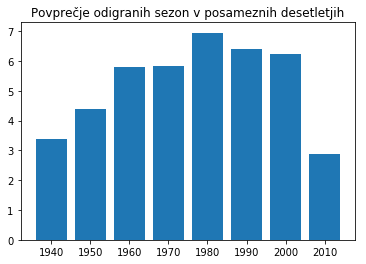

In [102]:
povprecje_sezon = {}
pari = []


for element in sezone:
    ime = int('{}'.format(element))
    povprecje_sezon[ime] = sezone[element]['seasons'].mean().round(decimals = 2)
    

x = []
y = []
z = []

#v seznamih x in y bosta podatka za isto obdobje na istem mestu, le da seznama ne bosta urejena po vrsti po letih!

for element in povprecje_sezon:
    x.append(element)
    y.append(povprecje_sezon[element])
    

for i in range (len(x)):
    pari.append((x[i], y[i]))
    pari.sort()
    
x.sort()

for (leto, povprecje) in pari:
    z.append(povprecje)
    

    
graf = plot.bar(range(len(povprecje_sezon)), z)
plot.xticks(range(len(povprecje_sezon)), x)
plot.title('Povprečje odigranih sezon v posameznih desetletjih')


povprecje_sezon


Vidimo, da se povprečje odigranih sezon z desetletji bolj ali manj viša.
Najnižje povprečje igranih sezon je sicer med 2010 in 2020, a ta podatek seveda ni relevanten, saj večina teh igralcev še zdaleč ni zaključila s svojo NBA kariero. 
                                                    
    

Izračunamo povprečje točk na tekmo vseh igralcev in ga primerjamo s povprečjem igralcev na posameznih pozicijah. 

In [12]:
podatki['points_per_game'].mean().round(decimals = 2)

7.16

In [13]:
podatki.groupby('position')['points_per_game'].mean().round(decimals = 2)

position
C        5.67
C/PF     6.65
PF       6.58
PF/C     7.71
PF/SF    7.12
PG       7.49
PG/SG    7.90
SF       6.62
SF/PF    7.42
SF/SG    7.97
SG       6.76
SG/PG    8.70
SG/SF    9.31
Name: points_per_game, dtype: float64

Pričakovano so nad povprečjem igralci s kombinacijo PG in SG.

Pogledamo, iz katerih držav (oz. katere nacionalnosti so igralci) prihaja največ igralcev in koliko je Slovencev.

8


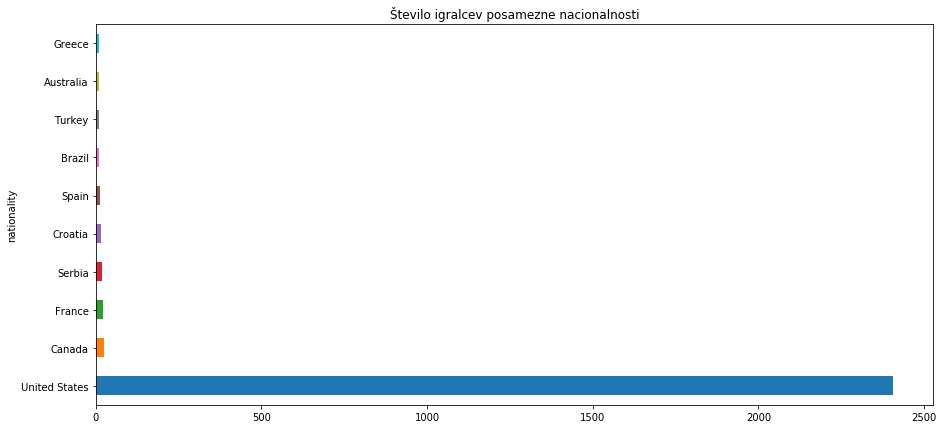

In [76]:
nacionalnost = podatki.groupby('nationality').size()
nacionalnost = nacionalnost.sort_values(ascending=False)
nacionalnost[:10].plot(kind='barh', figsize = (15, 7))
plot.title('Število igralcev posamezne nacionalnosti')


print(nacionalnost['Slovenia'])


Pričakovano je velika večina igralcev Američanov, v najmočnejši košarkarski ligi na svetu pa je igralo 8 Slovencev.

Pogledamo, koliko je aktivnih igralcev.

In [15]:
aktivni = 0
for leto in podatki['to']:
    if leto == '2018':
        aktivni += 1
    else:
        pass

aktivni

541

In [16]:
aktivni_igralci = podatki[podatki.to == '2018']
aktivni_igralci[:20]

,player_name,player_link,position,height,from,to,seasons,nationality,college,pick,points_per_game,rebounds_per_game,assists_per_game,field_goals,three_points,free_throws
7,Álex Abrines,alex-abrines,SG,1.98,2016,2018,2,Spain,Spain,32.0,4.7,1.5,0.4,40.0,38.0,85.0
10,Quincy Acy,quincy-acy,PF/C,2.01,2012,2018,6,United States,Baylor,37.0,5.9,3.7,0.8,36.0,35.0,82.0
18,Steven Adams,steven-adams,C,2.13,2013,2018,5,New Zealand,Pittsburgh,12.0,13.9,9.0,1.2,63.0,0.0,56.0
20,Bam Adebayo,bam-adebayo,C,2.08,2017,2018,1,United States,Kentucky,14.0,6.9,5.5,1.5,51.0,0.0,72.0
23,Arron Afflalo,arron-afflalo,SG/SF,1.96,2007,2018,11,United States,UCLA,27.0,3.4,1.2,0.6,40.0,39.0,85.0
36,Cole Aldrich,cole-aldrich,C,2.11,2010,2018,8,United States,Kansas,11.0,0.6,0.7,0.1,33.0,0.0,33.0
37,LaMarcus Aldridge,lamarcus-aldridge,C/PF,2.11,2006,2018,12,United States,Texas,2.0,23.1,8.5,2.0,51.0,29.0,84.0
49,Jarrett Allen,jarrett-allen,C,2.11,2017,2018,1,United States,Texas,22.0,8.2,5.4,0.7,59.0,33.0,78.0
51,Kadeem Allen,kadeem-allen,PG/SG,1.91,2017,2018,1,United States,Arizona,53.0,1.1,0.6,0.7,27.0,0.0,78.0
56,Tony Allen,tony-allen,SG/SF,1.93,2004,2018,14,United States,Oklahoma,25.0,4.7,2.1,0.4,48.0,33.0,52.0


Pogledamo podatke MVP igralca rednega dela zadnje sezone, Jamesa Hardna (MVP = most valuble player)

In [17]:
JH = aktivni_igralci[aktivni_igralci.player_link == 'james-harden']
JH

,player_name,player_link,position,height,from,to,seasons,nationality,college,pick,points_per_game,rebounds_per_game,assists_per_game,field_goals,three_points,free_throws
1323,James Harden,james-harden,SG/PG,1.96,2009,2018,9,United States,Arizona,3.0,30.4,5.4,8.8,45.0,37.0,86.0


Pogledamo, koliko igralcev je imelo višja povprečja (posebej za točke, skoke ...) na tekmo kot James Harden.

In [18]:
točke = aktivni_igralci[aktivni_igralci.points_per_game > 30.4]
skoki = aktivni_igralci[aktivni_igralci.rebounds_per_game > 5.4]
asistence = aktivni_igralci[aktivni_igralci.assists_per_game > 8.8]
meti_igra = aktivni_igralci[aktivni_igralci.field_goals > 45.0]
trojke = aktivni_igralci[aktivni_igralci.three_points > 37.0]
prosti_meti = aktivni_igralci[aktivni_igralci.free_throws > 86.0]

In [19]:
točke['player_name'].count()


0

Vidimo, da je James Harden vodilni v številu točk. Ali velja enako tudi za ostalo?

In [20]:
skoki['player_name'].count()

79

In [33]:
print(asistence['player_name'].count())
asistence


3


,player_name,player_link,position,height,from,to,seasons,nationality,college,pick,points_per_game,rebounds_per_game,assists_per_game,field_goals,three_points,free_throws
1608,LeBron James,lebron-james,SF/PF,2.03,2003,2018,15,United States,St.,1.0,27.5,8.6,9.1,54.0,37.0,73.0
3437,John Wall,john-wall,PG,1.93,2010,2018,8,United States,Kentucky,1.0,19.4,3.7,9.6,42.0,37.0,73.0
3518,Russell Westbrook,russell-westbrook,PG,1.91,2008,2018,10,United States,UCLA,4.0,25.4,10.1,10.3,45.0,30.0,74.0


In [22]:
meti_igra['player_name'].count()


185

Zanimiv podatek je, da je njegovo povprečje zadetih metov iz igre šele 186. najboljše po vrsti. 
185 igralcev ima boljši procent meta iz igre, torej Harden 'porabi veliko žog', da lahko drži tako visoko povprečje
danih točk na tekmo.

In [23]:
trojke['player_name'].count()

106

Čeprav Harden velja za dobrega šuterja iz razdalje, je še vedno 106 igralcev procentualno boljših od njega.

In [24]:
prosti_meti['player_name'].count()

50

Vodilni je torej le v številu danih točk na tekmo.


Ogledamo si grafe nekaterih povezav, za ketere mislimo, da bi lahko bile ključne za dosego igralčevih rezultatov.

Text(0,0.5,'Asistence')

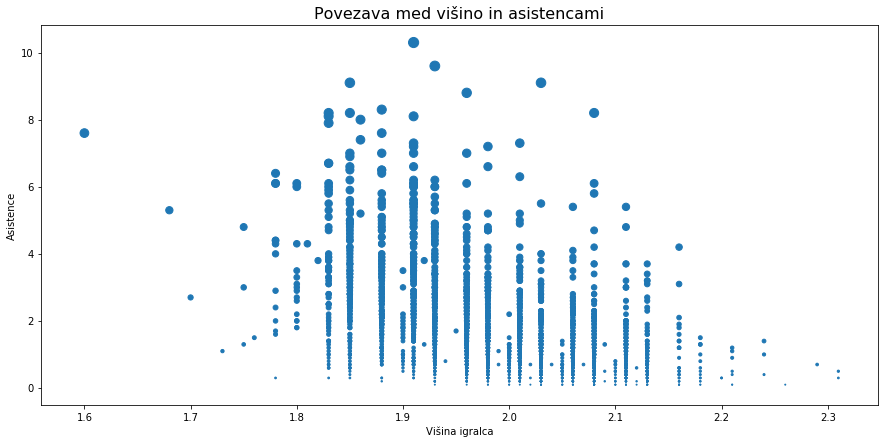

In [96]:
podatki.plot.scatter('height', 'assists_per_game', s=podatki['assists_per_game']*10, figsize = (15, 7))
plt.title('Povezava med višino in asistencami', fontsize=16)
plt.xlabel('Višina igralca', fontsize=10)
plt.ylabel('Asistence', fontsize=10)

Text(0,0.5,'Skoki')

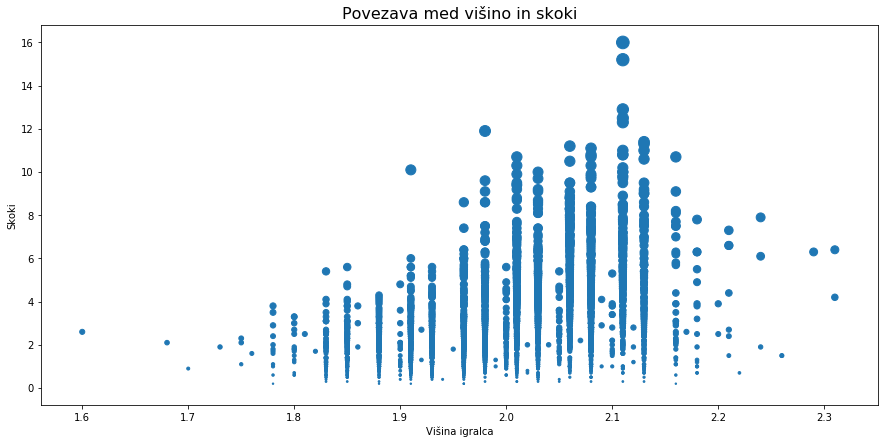

In [97]:
podatki.plot.scatter('height', 'rebounds_per_game', s=podatki['rebounds_per_game']*10, figsize = (15, 7))
plt.title('Povezava med višino in skoki', fontsize=16)
plt.xlabel('Višina igralca', fontsize=10)
plt.ylabel('Skoki', fontsize=10)

Pričakovano sta grafa videti "zrcalno". Torej višji igralci na tekmi pridobijo več skokov kot nižji, nižji igralci pa naredijo več asistenc. 

Text(0,0.5,'Dosežene točke')

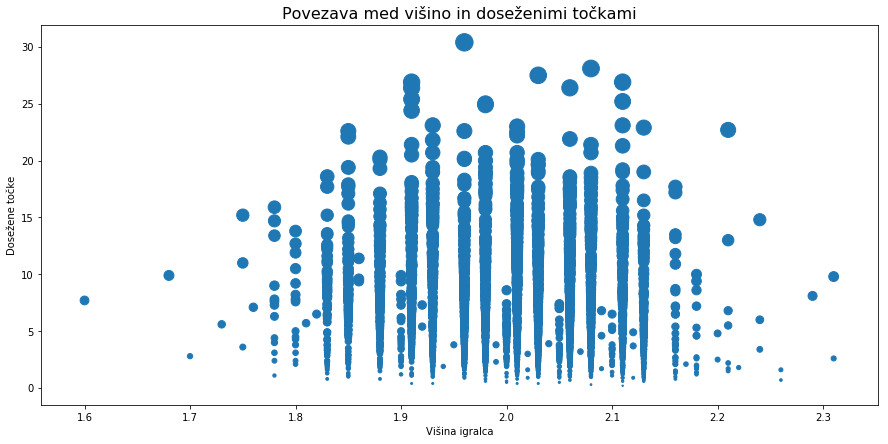

In [98]:
podatki.plot.scatter('height', 'points_per_game', s=podatki['points_per_game']*10, figsize = (15, 7))
plt.title('Povezava med višino in doseženimi točkami', fontsize=16)
plt.xlabel('Višina igralca', fontsize=10)
plt.ylabel('Dosežene točke', fontsize=10)

Največ točk v povprečju dosegajo igralci okoli povprečne višine.

Izrišemo graf, v katerem primerjamo statistiko nekaterih zanimivejših igralcev, ki so bili v zadnji sezoni izbrani za nastop na tekmi vseh zvezd 
(VSI : Kyrie Irving,
DeMar DeRozan,
LeBron James,
Joel Embiid,
Giannis Antetokounmpo,
Bradley Beal,
Goran Dragić,
Al Horford,
Kevin Love,
Kyle Lowry,
Victor Oladipo,
Kristaps Porziņģis,
John Wall,
Andre Drummond,
Kemba Walker,
Stephen Curry,
James Harden,
Kevin Durant,
DeMarcus Cousins,
Anthony Davis,
Russell Westbrook,
Damian Lillard,
Draymond Green,
Karl-Anthony Towns,
LaMarcus Aldridge,
Klay Thompson,
Jimmy Butler,
Paul George.
MOJ IZBOR : Goran Dragić, LeBron James, Stephen Curry, Kevin Durant, Ben Simmons) 
in statistiko Kobe Bryanta, ki velja za enega najboljših košarkašev vseh časov.

In [47]:
Goran_Dragic = aktivni_igralci[aktivni_igralci.player_link == 'goran-dragic']
LeBron_James = aktivni_igralci[aktivni_igralci.player_link == 'lebron-james']
Stephen_Curry = aktivni_igralci[aktivni_igralci.player_link == 'stephen-curry']
Kevin_Durant = aktivni_igralci[aktivni_igralci.player_link == 'kevin-durant']
Ben_Simmons = aktivni_igralci[aktivni_igralci.player_link == 'ben-simmons']
Kobe_Bryant = podatki[podatki.player_link == 'kobe-bryant']

Goran_Dragic

,player_name,player_link,position,height,from,to,seasons,nationality,college,pick,points_per_game,rebounds_per_game,assists_per_game,field_goals,three_points,free_throws
861,Goran Dragic,goran-dragic,PG,1.91,2008,2018,10,Slovenia,Slovenia,45.0,17.3,4.1,4.8,45.0,37.0,80.0


In [40]:
LeBron_James

,player_name,player_link,position,height,from,to,seasons,nationality,college,pick,points_per_game,rebounds_per_game,assists_per_game,field_goals,three_points,free_throws
1608,LeBron James,lebron-james,SF/PF,2.03,2003,2018,15,United States,St.,1.0,27.5,8.6,9.1,54.0,37.0,73.0


In [41]:
Stephen_Curry

,player_name,player_link,position,height,from,to,seasons,nationality,college,pick,points_per_game,rebounds_per_game,assists_per_game,field_goals,three_points,free_throws
723,Stephen Curry,stephen-curry,PG,1.91,2009,2018,9,United States,Davidson,7.0,26.4,5.1,6.1,50.0,42.0,92.0


In [42]:
Kevin_Durant

,player_name,player_link,position,height,from,to,seasons,nationality,college,pick,points_per_game,rebounds_per_game,assists_per_game,field_goals,three_points,free_throws
889,Kevin Durant,kevin-durant,SF/PF,2.06,2007,2018,11,United States,Texas,2.0,26.4,6.8,5.4,52.0,42.0,89.0


In [43]:
Ben_Simmons

,player_name,player_link,position,height,from,to,seasons,nationality,college,pick,points_per_game,rebounds_per_game,assists_per_game,field_goals,three_points,free_throws
3005,Ben Simmons,ben-simmons,PG/SG,2.08,2017,2018,1,Australia,Louisiana,1.0,15.8,8.1,8.2,55.0,0.0,56.0


In [44]:
Kobe_Bryant

,player_name,player_link,position,height,from,to,seasons,nationality,college,pick,points_per_game,rebounds_per_game,assists_per_game,field_goals,three_points,free_throws
450,Kobe Bryant,kobe-bryant,SG/SF,1.98,1996,2016,20,United States,Lower,13.0,25.0,5.2,4.7,45.0,33.0,84.0
